# Cohort Analysis on Customer Data

* Cohort analysis allows a company to "see patterns clearly across the life-cycle of a customer (or user), rather than slicing across all customers blindly without accounting for the natural cycle that a customer undergoes. By seeing these patterns of time, a company can adapt and tailor its service to those specific cohorts.

https://en.wikipedia.org/wiki/Cohort_analysis

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
 
# load in the data and take a look 
data = pd.read_csv("../data_sets/online_retail.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


class CohortAnalysis:
    """
    The class performs cohort analysis on customer data from an online retail dataset. It 
    preprocesses the data byremoving rows without customer IDs, extracting the invoice 
    month and cohort month, and calculating the cohort index. It then creates a cohort 
    table based on customer cohorts and provides visualization of the cohort analysis using 
    heatmaps. The class allows users to gain insights into customer behavior and retention 
    patterns over time.

    Dataset:
    - The dataset contains online retail transaction records.
    - Columns: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, 
      CustomerID, Country.

    Data Processing Steps:
    1. Load the dataset from a CSV file.
    2. Drop rows without CustomerID.
    3. Extract the month from the InvoiceDate column to create the Invoice-Month.
    4. Determine the first month visit of each customer and assign it as the Cohort-Month.
    5. Calculate the Cohort-Index based on the difference between the Invoice-Month and 
       Cohort-Month.
    6. Group the data by Cohort-Month and Cohort-Index, counting the unique CustomerIDs.
    7. Create a cohort table with Cohort-Month as the index, Cohort-Index as the columns, 
       and CustomerID counts as values.
    8. Visualize the cohort table using a heatmap to understand customer retention and behavior.
    9. Create a percentage-based cohort table for a more detailed analysis of customer retention.
    """
    def __init__(self, data_file):
        self.data = pd.read_csv(data_file)
        self.cohort_table = None

    def preprocess_data(self):
        # Eliminating rows without customer ID
        self.data = self.data.dropna(subset=['CustomerID'])

        # Convert 'InvoiceDate' column to datetime type
        self.data['InvoiceDate'] = pd.to_datetime(self.data['InvoiceDate'])

        # Function for getting the invoice month
        def getting_months(m):
            return dt.datetime(m.year, m.month, 1)

        # Using the above function to get the invoice month
        self.data['Invoice-Month'] = self.data['InvoiceDate'].apply(getting_months)

        # Indexing a column for the first month visit of the customer
        self.data['Cohort-Month'] = self.data.groupby('CustomerID')['Invoice-Month'].transform('min')

    def calculate_cohort_index(self):
        def get_date_elements(df, column):
            day = df[column].dt.day
            month = df[column].dt.month
            year = df[column].dt.year
            return day, month, year

        # Getting date elements for columns 'Invoice-Month' and 'Cohort-Month'
        invoice_day, invoice_month, invoice_year = get_date_elements(self.data, 'Invoice-Month')
        cohort_day, cohort_month, cohort_year = get_date_elements(self.data, 'Cohort-Month')

        # Cohort index creation
        yeardifference = invoice_year - cohort_year
        monthdifference = invoice_month - cohort_month
        self.data['Cohort-Index'] = yeardifference * 12 + monthdifference + 1
    
    def create_cohort_table(self):
        # Counting unique customer IDs
        cohort_data = self.data.groupby(['Cohort-Month', 'Cohort-Index'])['CustomerID'].apply(pd.Series.nunique).reset_index()

        # Pivot table creation
        self.cohort_table = cohort_data.pivot(index='Cohort-Month', columns=['Cohort-Index'], values='CustomerID')

        # Changing index of the cohort table
        self.cohort_table.index = self.cohort_table.index.strftime('%B %Y')

    def visualize_heatmap(self):
        plt.figure(figsize=(21, 10))
        sns.heatmap(self.cohort_table, annot=True, cmap='Greens')
        plt.show()

    def visualize_percentage_heatmap(self):
        # Cohort for percentage analysis
        new_cohort_table = self.cohort_table.divide(self.cohort_table.iloc[:, 0], axis=0)

        plt.figure(figsize=(21, 10))
        colormap = sns.color_palette("mako", as_cmap=True)
        sns.heatmap(new_cohort_table, annot=True, fmt='.0%', cmap=colormap)
        plt.show()
        

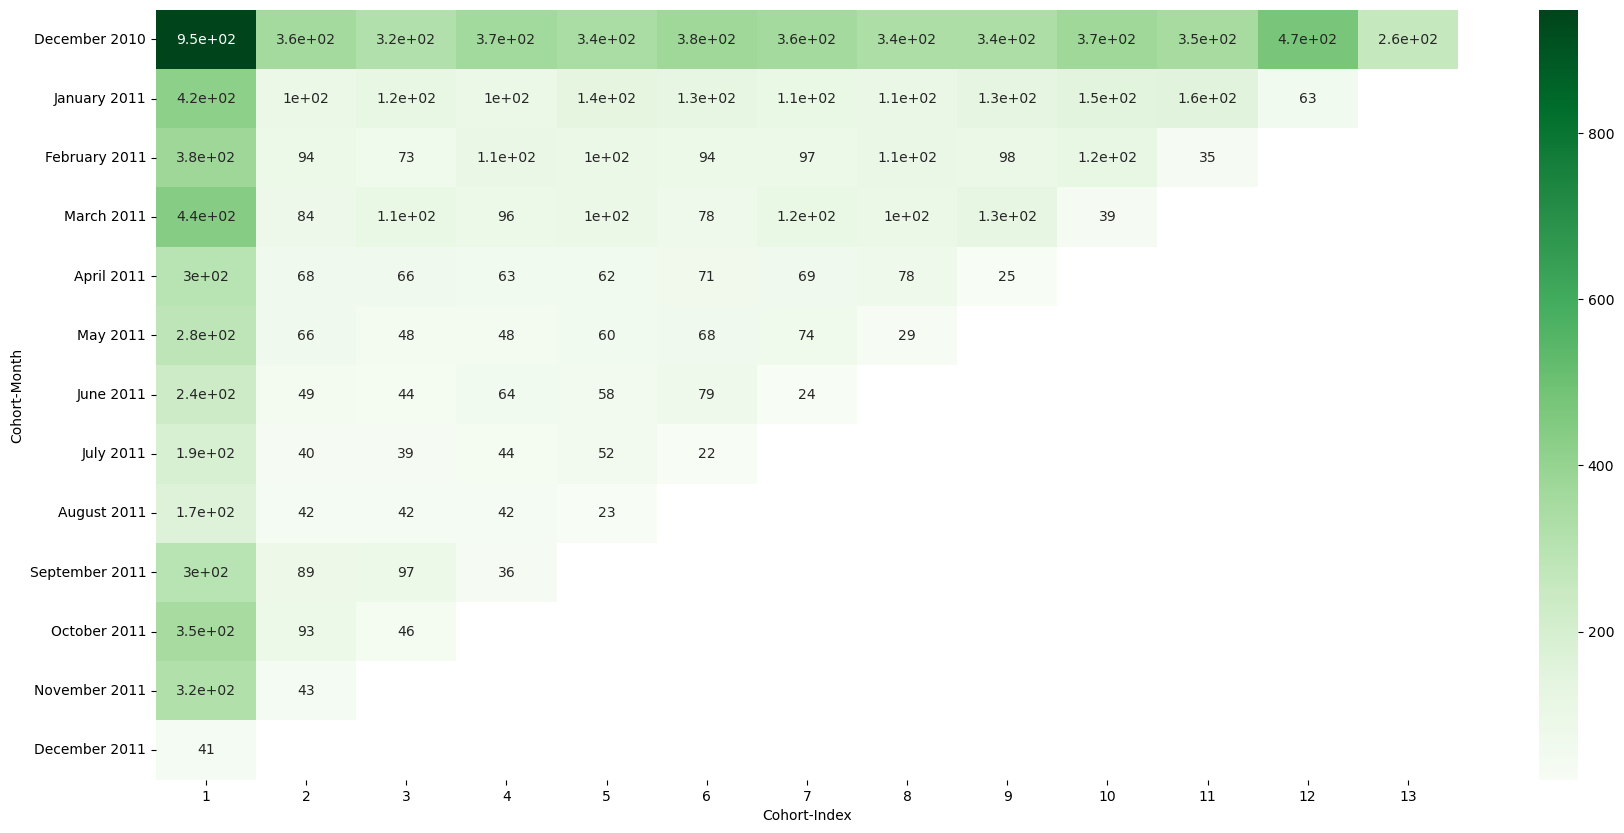

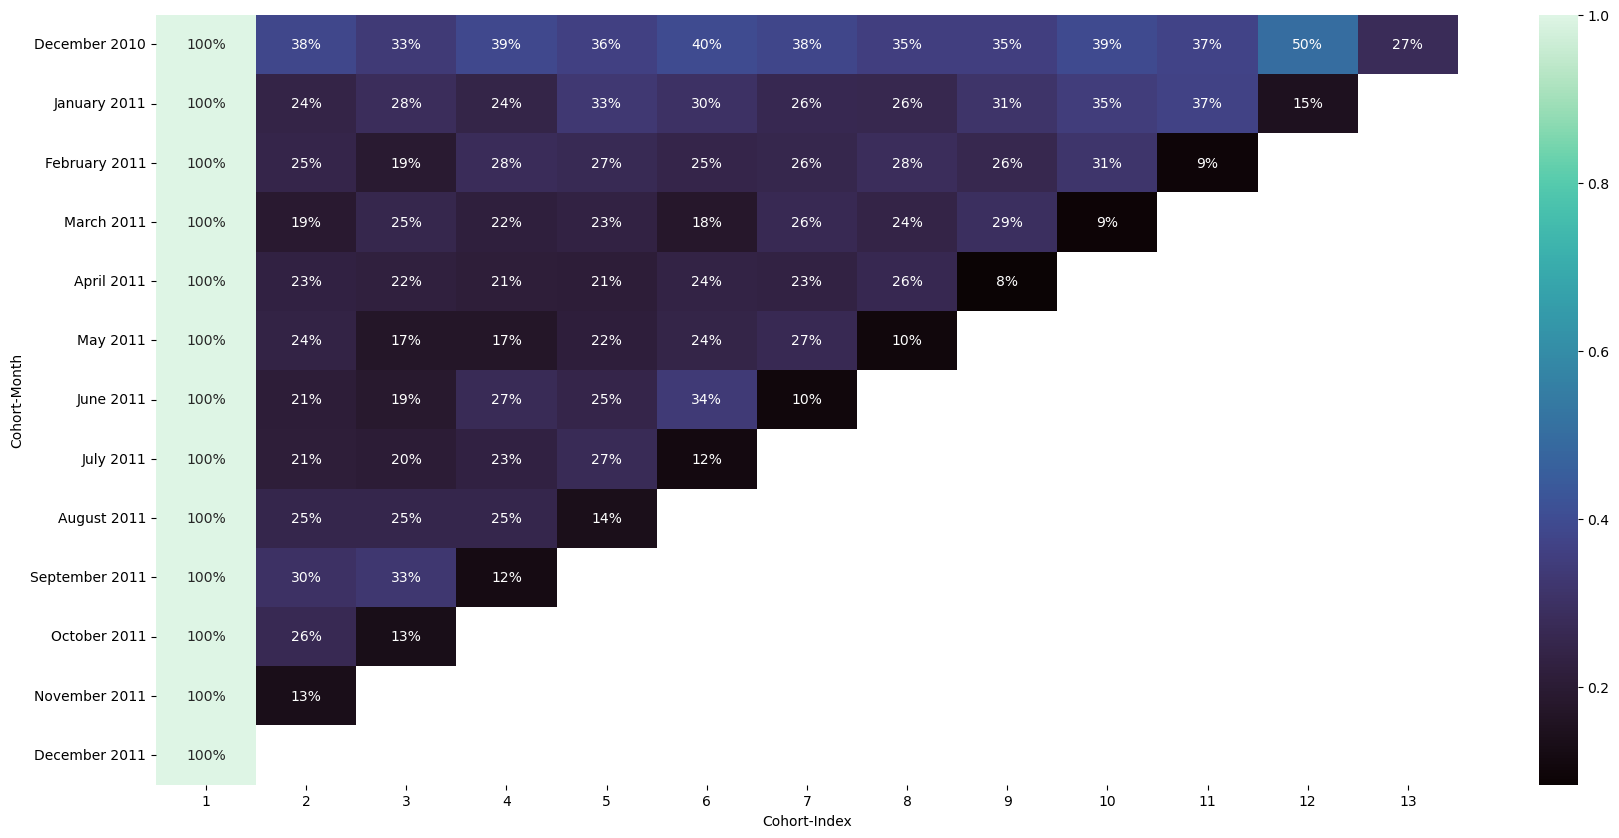

In [14]:
# Example usage:
cohort_analysis = CohortAnalysis("../data_sets/online_retail.csv")
cohort_analysis.preprocess_data()
cohort_analysis.calculate_cohort_index()
cohort_analysis.create_cohort_table()
cohort_analysis.visualize_heatmap()
cohort_analysis.visualize_percentage_heatmap()

# Resutls Explained 

The cohort analysis on the dataset provides valuable insights into customer behavior and retention patterns over time. Here's a description of the results obtained from the analysis:

1. Cohort Table: The cohort analysis generates a cohort table that presents the customer counts based on their cohort month and cohort index. Each cell in the table represents the number of unique customers who made their first purchase during a specific cohort month and continued to make purchases in subsequent months. The cohort table allows for a visual understanding of customer retention and engagement over time.

2. Heatmap Visualization: The cohort table is visualized using a heatmap, where each cell is color-coded based on the customer counts. The heatmap provides a clear visual representation of customer retention patterns across different cohorts and time periods. It allows you to identify cohorts with high retention and engagement (indicated by darker cells) as well as cohorts with lower retention (indicated by lighter cells).

3. Percentage-Based Cohort Table: To gain deeper insights, the cohort analysis also generates a percentage-based cohort table. This table presents the retention rates as percentages, allowing for a more detailed analysis of customer retention within each cohort. Each cell in the table represents the percentage of customers from the initial cohort who continued to make purchases in subsequent months. This analysis helps identify cohorts with the highest and lowest retention rates.

By analyzing the cohort table and heatmap, you can identify trends and patterns in customer behavior. You can observe how different cohorts perform over time, which cohorts have the highest retention rates, and how customer engagement changes across cohorts. This information is crucial for understanding customer lifetime value, optimizing marketing strategies, and improving customer retention and satisfaction.